In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rioxarray as rxr

import earthpy as et

In [2]:
# setup
pdir = Path.cwd()
# ddir = 
ddir = pdir / 'data' / 'colorado-flood'

ddir

PosixPath('/Users/zefang/Documents/career/learning/programming/python/gis/data/colorado-flood')

In [6]:
ddir.exists()

True

In [3]:
# open lidar derived digital elevation model (DEM)

dem_pre_path = ddir / 'spatial' / 'boulder-leehill-rd' / 'pre-flood' / 'lidar' / 'pre_DTM.tif'

dem_pre_path.exists()

True

In [4]:
dtm_pre_arr = rxr.open_rasterio(dem_pre_path)

dtm_pre_arr

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -3.4028235e+38
    scale_factor:   1.0
    add_offset:     0.0

In [7]:
dtm_pre_arr.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32613"]]')

In [8]:
dtm_pre_arr.rio.bounds()

(472000.0, 4434000.0, 476000.0, 4436000.0)

In [9]:
dtm_pre_arr.rio.nodata

-3.4028235e+38

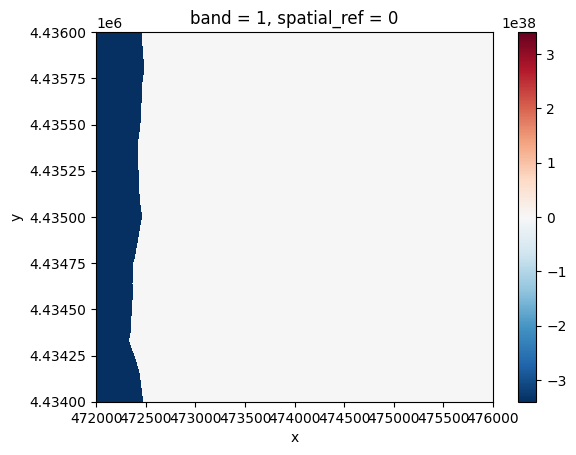

In [10]:
dtm_pre_arr.plot()

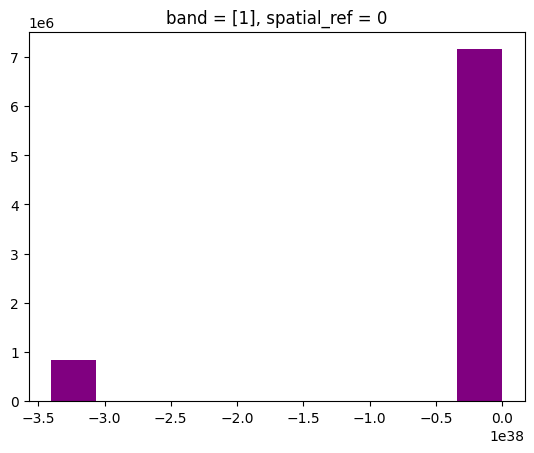

In [11]:
dtm_pre_arr.plot.hist(color='purple')
plt.show()

In [12]:
dtm_pre_arr.values.min()

-3.4028235e+38

In [14]:
dtm_pre_arr.values.max()

2087.43

In [15]:
dtm_pre_arr.shape

(1, 2000, 4000)

In [17]:
# Open the data and mask no data values
# Squeeze reduces the third dimension given there is only one "band" or layer to this data
dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True).squeeze()
# Notice there are now only 2 dimensions to your array
dtm_pre_arr.shape

(2000, 4000)

In [18]:
dtm_pre_arr

<xarray.DataArray (y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

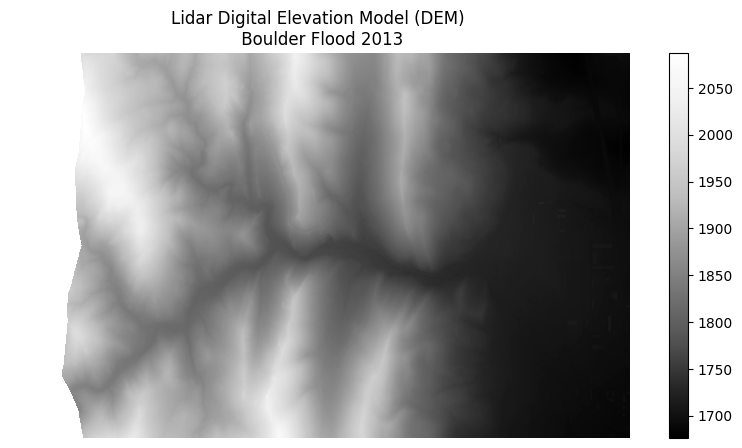

In [20]:
# Plot the data and notice that the scale bar looks better
# No data values are now masked
f, ax = plt.subplots(figsize=(10, 5))
dtm_pre_arr.plot(cmap="Greys_r",
                 ax=ax)
ax.set_title("Lidar Digital Elevation Model (DEM) \n Boulder Flood 2013")
ax.set_axis_off()
plt.show()

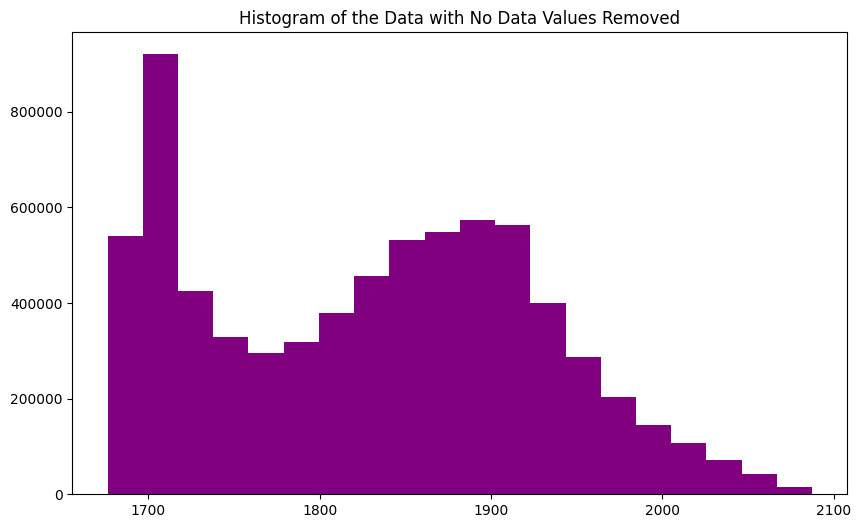

In [21]:
f, ax = plt.subplots(figsize=(10, 6))
dtm_pre_arr.plot.hist(color="purple",
                      bins=20)
ax.set_title("Histogram of the Data with No Data Values Removed")
plt.show()

In [22]:
print("The minimum raster value is: ", np.nanmin(dtm_pre_arr.data))
print("The maximum raster value is: ", np.nanmax(dtm_pre_arr.data))

The minimum raster value is:  1676.21
The maximum raster value is:  2087.43


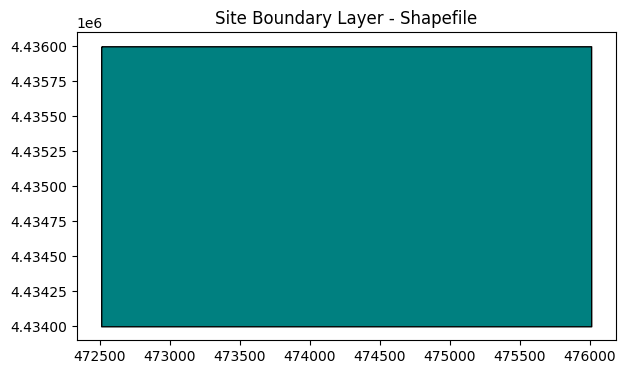

In [24]:
# Open site boundary vector layer
site_bound_path = Path.joinpath(ddir,
                               "spatial",
                               "boulder-leehill-rd",
                               "clip-extent.shp")
site_bound_shp = gpd.read_file(site_bound_path)

# Plot the vector data
f, ax = plt.subplots(figsize=(8,4))
site_bound_shp.plot(color='teal',
                    edgecolor='black',
                    ax=ax)
ax.set(title="Site Boundary Layer - Shapefile")
plt.show()

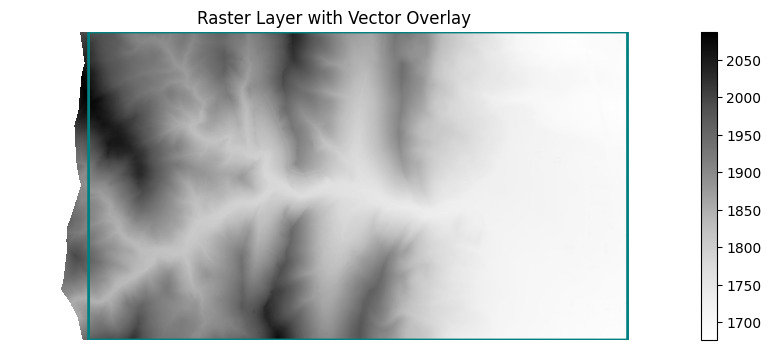

In [25]:
f, ax = plt.subplots(figsize=(11, 4))

dtm_pre_arr.plot.imshow(cmap="Greys",
                        ax=ax)
site_bound_shp.plot(color='None',
                    edgecolor='teal',
                    linewidth=2,
                    ax=ax,
                    zorder=4)

ax.set(title="Raster Layer with Vector Overlay")
ax.axis('off')
plt.show()

# Spatial Raster Metadata: CRS, Resolution, and Extent in Python

In [26]:
# Define relative path to file
lidar_dem_path = Path.joinpath(ddir,
                              "spatial",
                              "boulder-leehill-rd",
                              "pre-flood",
                              "lidar",
                              "pre_DTM.tif")

# View crs of raster imported with rasterio
lidar_dem = rxr.open_rasterio(lidar_dem_path, masked=True)
print("The CRS of this data is:", lidar_dem.rio.crs)

The CRS of this data is: EPSG:32613


In [27]:
lidar_dem.rio.crs

CRS.from_wkt('PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32613"]]')

In [29]:
a_crs = lidar_dem.rio.crs
# Assign crs to myCRS object - this is just an example of how you would do that
lidar_dem = lidar_dem.rio.write_crs(a_crs, inplace=True)

In [32]:
list(et.epsg.keys())[:10]

['29188',
 '26733',
 '24600',
 '32189',
 '4899',
 '29189',
 '26734',
 '7402',
 '26951',
 '29190']

In [33]:
proj4 = et.epsg['32613']
proj4

'+proj=utm +zone=13 +datum=WGS84 +units=m +no_defs'

In [34]:
# Spatial Extent
lidar_dem.rio.bounds()

(472000.0, 4434000.0, 476000.0, 4436000.0)

In [35]:
# resolution
lidar_dem.rio.resolution()

(1.0, -1.0)

In [36]:
# geptiff
lidar_dem.rio.count

1

# Plot hillshade

In [39]:
from rasterio.plot import plotting_extent
import earthpy.plot as ep

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

In [40]:
dtm_hill = rxr.open_rasterio(ddir / 'spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM_hill.tif')

dtm_hill

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 8MB
[8000000 values with dtype=uint8]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0